# Sprint23　ゲート付きリカレントニューラルネットワーク

## 【問題1】各種手法の実行

### LSTM

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


ValueError: Object arrays cannot be loaded when allow_pickle=False

#### データ読み込みでエラーになる    

以下で解決
https://blog.amedama.jp/entry/keras-imdb-problem-workaround

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

Using TensorFlow backend.


In [0]:
from functools import partial
import numpy as np
np.load = partial(np.load, allow_pickle=True) 

In [0]:
from keras.datasets import imdb

In [4]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


In [5]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=12,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...



Train on 25000 samples, validate on 25000 samples
Epoch 1/12





25000/25000 [==============================] - 132s 5ms/step - loss: 0.4632 - acc: 0.7794 - val_loss: 0.3941 - val_acc: 0.8229
Epoch 2/12
25000/25000 [==============================] - 123s 5ms/step - loss: 0.2985 - acc: 0.8792 - val_loss: 0.3728 - val_acc: 0.8386
Epoch 3/12
25000/25000 [==============================] - 125s 5ms/step - loss: 0.2098 - acc: 0.9180 - val_loss: 0.4159 - val_acc: 0.8338
Epoch 4/12
25000/25000 [==============================] - 127s 5ms/step - loss: 0.1466 - acc: 0.9454 - val_loss: 0.4562 - val_acc: 0.8222
Epoch 5/12
25000/25000 [==============================] - 124s 5ms/step - loss: 0.1053 - acc: 0.9617 - val_loss: 0.6112 - val_acc: 0.8280
Epoch 6/12
25000/25000 [==============================] - 126s 5ms/step - loss: 0.0794 - acc: 0.9727 - val_loss: 0.7206 - val_acc: 0.8253
Epoch 7/1

#### notebook落ちるのでcollabで・・・

### SimpleRNN

#### レイヤーインポート

In [0]:
from keras.layers import SimpleRNN

#### モデル構築

In [8]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


#### コンパイルとフィット

In [9]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 36s 1ms/step - loss: 0.6799 - acc: 0.5562 - val_loss: 0.6080 - val_acc: 0.6645
Epoch 2/3
25000/25000 [==============================] - 35s 1ms/step - loss: 0.5212 - acc: 0.7444 - val_loss: 0.4762 - val_acc: 0.7819
Epoch 3/3
25000/25000 [==============================] - 6s 241us/step
Test score: 0.5132133572864532
Test accuracy: 0.7616


### GRU

#### レイヤーインポート

In [0]:
from keras.layers import GRU

#### モデル構築

In [11]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


#### モデルコンパイルとフィット

In [12]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 104s 4ms/step - loss: 0.4848 - acc: 0.7594 - val_loss: 0.3772 - val_acc: 0.8358
Epoch 2/3
25000/25000 [==============================] - 103s 4ms/step - loss: 0.2976 - acc: 0.8799 - val_loss: 0.3544 - val_acc: 0.8480
Epoch 3/3
25000/25000 [==============================] - 17s 697us/step
Test score: 0.4329460291337967
Test accuracy: 0.83856


### ConvLSTM2D

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 950 samples, validate on 50 samples
Epoch 1/30





950/950 [==============================] - 65s 68ms/step - loss: 0.2327 - val_loss: 0.0658
Epoch 2/30
950/950 [==============================] - 47s 49ms/step - loss: 0.0136 - val_loss: 0.0071
Epoch 3/30
950/950 [==============================] - 48s 50ms/step - loss: 0.0027 - val_loss: 0.0126
Epoch 4/30
950/950 [==============================] - 47s 50ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/30
950/950 [==============================] - 48s 50ms/step - loss: 6.3245e-04 - val_loss: 7.4838e-04
Epoch 6/30
950/950 [==============================] - 47s 50ms/step - loss: 4.8213e-04 - val_loss: 6.1737e-04
Epoch 7/30
950/950 [==============================] - 48s 50ms/step - loss: 3.9808e-04 - val_loss: 5.2950e-04
Epoch 8/30
950/950 [==============================] - 47s 50ms/step - loss: 3.4005e-04 - val_loss: 4.8215e-04

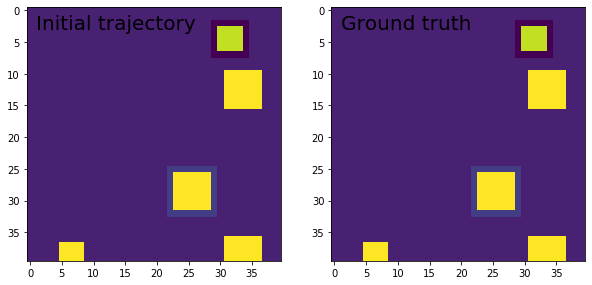

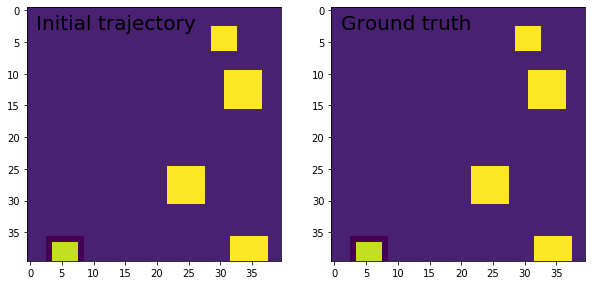

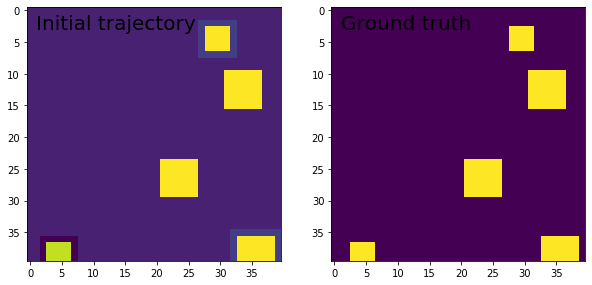

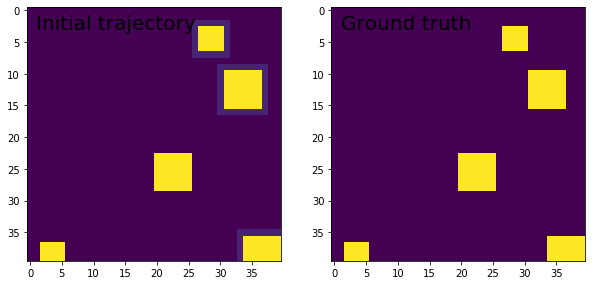

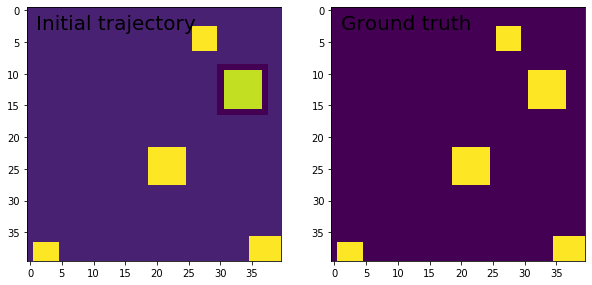

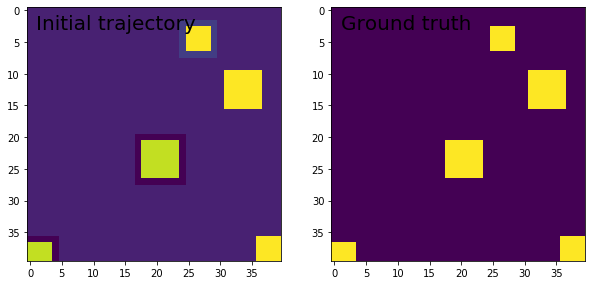

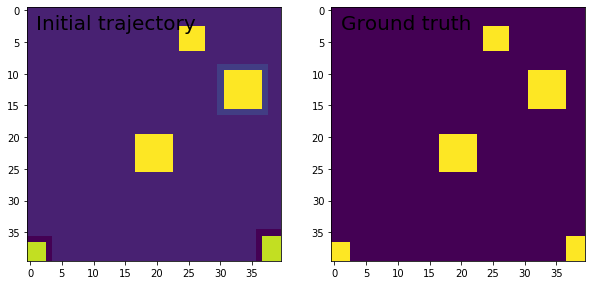

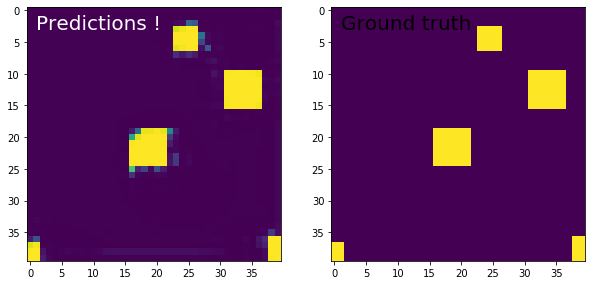

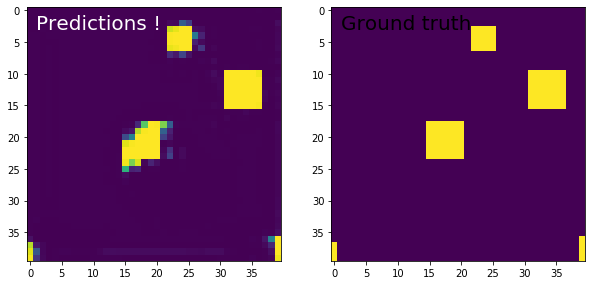

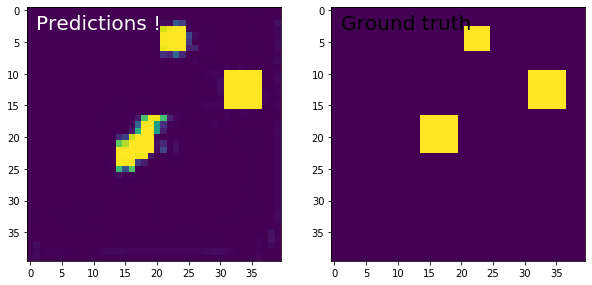

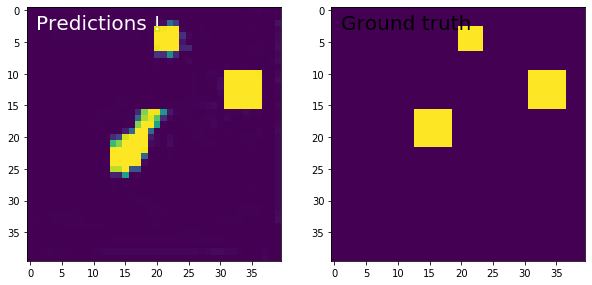

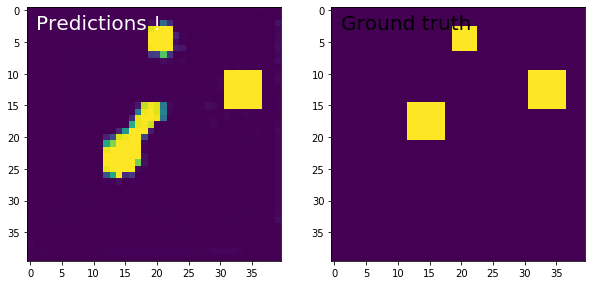

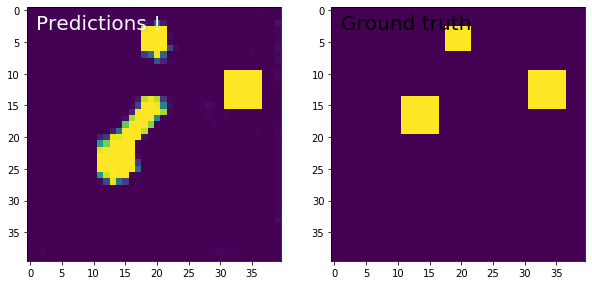

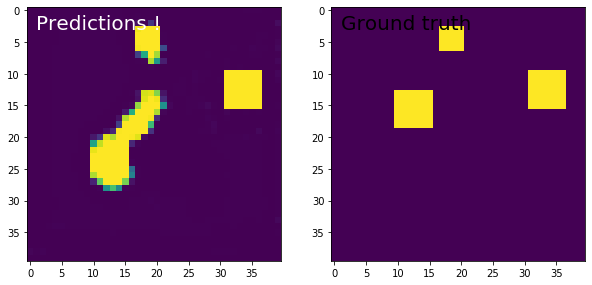

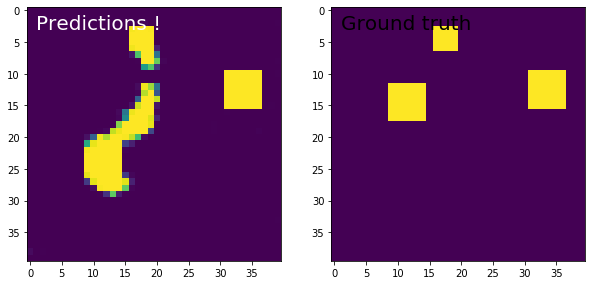

In [1]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=30, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題2】（アドバンス課題）複数のデータセット間での比較

#### アドバンスなのでスキップ

## 【問題3】他のクラスの説明

最低5つ簡単に説明

RNN
ニューラルネットワークの出力を別のネットワークの入力として利用するような再帰的構造を持ったニューラルネットワーク

SimpleRNNCell
下と左から1つずつの入力を受け、上と右に出力します。つまり、入力系列の一つと前のRNNCellの状態を初期状態として入力し、更新された隠れ状態を上（スタックされたRNNCellまたは出力系列）と右（次のRNNCellへの状態入力）に出力しています。

GRUCell
Gated Recurrent Unit(GRU)は、LSTMをもう少しシンプルにしたモデルです。入力ゲートと忘却ゲートを「更新ゲート」として１つのゲートに統合しています。それをCELLとして利用できるもの

LSTMCell
LSTM（）は一般にLSTMネットワークを作成しますが、LSTMCell（）は1つのセルのみを返します。
ただし、ほとんどの場合、プログラムで使用するLSTMセルは1つだけです。

StackedRNNCells
StackedRNNCellsは、レイヤーではなくセルでのみ機能します。RNNのセルとレイヤーの違いは、セルがシーケンス全体で1つのタイムステップのみを処理するのに対し、レイヤーはシーケンス全体を処理することです。RNNレイヤーを次のように扱うことができます。

CuDNNLSTM
CudnnLSTMには、LSTMに追加できる多くの付加機能がありません（例、繰り返しドロップアウトはありません）。ただし、これらが必要ない場合は、使用しても欠点はありません。通常のLSTMアルゴリズムが実装されます。また、Cudnnライブラリが更新されたり、投影レイヤーが最近追加されたなど、より多くの機能が追加されています。
Cudnn LSTMは、「通常の」バージョンよりも驚くほど高速です。テンソルフローとpytorchの両方で、10倍のパフォーマンスの向上が容易に見られるため、多くの場合、それを使用するだけの価値があります。
